<a href="https://colab.research.google.com/github/ronghuwz/LSTM-stockprice_prediction/blob/main/LSTM_stock_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
# Load the data file
df=pd.read_csv('GOOG_2019-2024.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-06,58.124500,58.378300,57.774502,57.893002,57.893002,21986000
1,2019-03-07,57.785999,57.837749,56.745499,57.165001,57.165001,23332000
2,2019-03-08,56.336498,57.354000,56.165001,57.116001,57.116001,24248000
3,2019-03-11,57.222500,58.809502,57.222500,58.787998,58.787998,34384000
4,2019-03-12,58.912998,60.000000,58.912998,59.660000,59.660000,40262000
...,...,...,...,...,...,...,...
1255,2024-02-29,138.350006,139.949997,137.570007,139.779999,139.779999,35485000
1256,2024-03-01,139.610001,140.000000,137.975006,138.080002,138.080002,28522000
1257,2024-03-04,136.539993,136.630005,132.860001,134.199997,134.199997,43571500
1258,2024-03-05,132.740005,134.020004,131.550003,133.779999,133.779999,28447600


# New Section

In [ ]:
# Only keep the Date and Close columns
df=df[['Date','Close']]
df

,Date,Close
0,2019-03-06,57.893002
1,2019-03-07,57.165001
2,2019-03-08,57.116001
3,2019-03-11,58.787998
4,2019-03-12,59.660000
...,...,...
1255,2024-02-29,139.779999
1256,2024-03-01,138.080002
1257,2024-03-04,134.199997
1258,2024-03-05,133.779999


In [ ]:
# The data type of the Date column is string
df['Date']

0       2019-03-06
1       2019-03-07
2       2019-03-08
3       2019-03-11
4       2019-03-12
           ...    
1255    2024-02-29
1256    2024-03-01
1257    2024-03-04
1258    2024-03-05
1259    2024-03-06
Name: Date, Length: 1260, dtype: object

In [ ]:
# Define a function to converte date string to datetime
def str_to_datetime(s):
  split=s.split('-')
  year,month,day=int (split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

datetime_object=str_to_datetime('2019-03-06')
datetime_object

datetime.datetime(2019, 3, 6, 0, 0)

In [ ]:
# Convert all date strings in the df to datetime objects
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-28-ebd7153b3cff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      2019-03-06
1      2019-03-07
2      2019-03-08
3      2019-03-11
4      2019-03-12
          ...    
1255   2024-02-29
1256   2024-03-01
1257   2024-03-04
1258   2024-03-05
1259   2024-03-06
Name: Date, Length: 1260, dtype: datetime64[ns]

In [ ]:
# Make the datetime column the index
df.index=df.pop('Date')
df

,Close
Date,
2019-03-06,57.893002
2019-03-07,57.165001
2019-03-08,57.116001
2019-03-11,58.787998
2019-03-12,59.660000
...,...
2024-02-29,139.779999
2024-03-01,138.080002
2024-03-04,134.199997


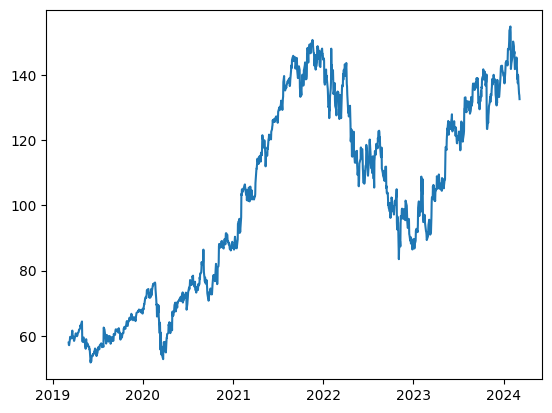

In [ ]:
#Plot the change of stock close price over time
plt.plot(df.index,df['Close'])

In [ ]:
#To get the value of the input date and it's three previous values

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    target_date = first_date
    dates = []
    X, Y = [], []

    while target_date <= last_date:
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        if len(df_subset) != n + 1:
            print(f'Warning: Window of size {n} is too large for date {target_date}')
            target_date += datetime.timedelta(days=1)
            continue

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        target_date += datetime.timedelta(days=1)

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

windowed_df = df_to_windowed_df(df, '2019-03-11', '2024-03-05', n=3)
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2019-03-11,57.893002,57.165001,57.116001,58.787998
1,2019-03-12,57.165001,57.116001,58.787998,59.660000
2,2019-03-13,57.116001,58.787998,59.660000,59.666000
3,2019-03-14,58.787998,59.660000,59.666000,59.277500
4,2019-03-15,59.660000,59.666000,59.277500,59.223000
...,...,...,...,...,...
1817,2024-03-01,140.100006,137.429993,139.779999,138.080002
1818,2024-03-02,140.100006,137.429993,139.779999,138.080002
1819,2024-03-03,140.100006,137.429993,139.779999,138.080002
1820,2024-03-04,137.429993,139.779999,138.080002,134.199997


In [ ]:
# Generating the input matrix X (with 3 time steps ahead target date), and generating the lable Y of the target date

def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np=windowed_dataframe.to_numpy()   #convert the datafram to a numpy array
  dates=df_as_np[:,0]        #get the date column
  middle_matrix=df_as_np[:,1:-1]      #get all the close price values
  X=middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))
  Y=df_as_np[:,-1]
  return dates, X.astype(np.float32),Y.astype(np.float32)
dates,X,y=windowed_df_to_date_X_y(windowed_df)
dates.shape,X.shape,y.shape


((1822,), (1822, 3, 1), (1822,))

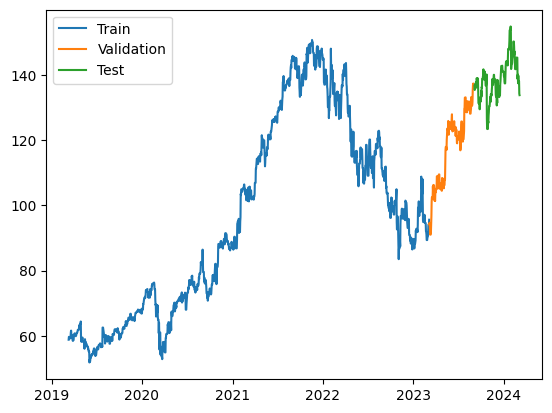

In [ ]:
# Split data set into training, validation, and test sets

q_80=int(len(dates)*.8)
q_90=int(len(dates)*.9)
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test,y_test)
plt.legend(['Train','Validation','Test'])

# Training Model

In [ ]:
# Built a sequential model
model=Sequential([layers.Input((3,1)),   # 3 days in the past, and 1 feature(close price)
                  layers.LSTM(32),    # 32 neurons in the LSTM layer, the bigger the number, the more complicated the model is and more prone to overfitting
                  layers.Dense(32,activation='relu'),
                  layers.Dense(32,activation='relu'),
                  layers.Dense(1)])
model.summary()

# Model training with learning rate of 0.001
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4352      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6497 (25.38 KB)
Trainable params: 6497 (25.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# # !pip install wrappers
# # !pip install scikeras
# import keras
# from scikeras.wrappers import KerasRegressor
# import tensorflow as tf
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# def create_model():
#       model = keras.models.Sequential()
#       model.add(keras.layers.LSTM(units = 32, input_shape=(3, 1)))
#       model.add(keras.layers.Dense(32))
#       model.add(keras.layers.Activation("relu"))
#       model.add(keras.layers.Dense(32))
#       model.add(keras.layers.Activation("relu"))
#       model.add(keras.layers.Dense(1))
#       model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
#       return model


# clf = KerasRegressor(model=create_model, loss="mse")

# # clf.fit(X_train, y_train)

# # batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [10, 50, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# # params = {
# #     # "hidden_layer_dim": [50, 100, 200],
# #     # "loss": ["sparse_categorical_crossentropy"],
# #     "model__units": [32, 64, 100],
# #     # "model__optimizer": ["adam", "sgd"],
# #     # "optimizer__learning_rate": [0.0001, 0.001, 0.1],
# # }

# gs = GridSearchCV(clf, param_grid=param_grid, cv=3, error_score='raise', scoring='accuracy')

# gs.fit(X_train, y_train)
# print(gs.best_score_, gs.best_params_)


#     # model = Sequential([
#     #     Input(shape=(3, 1)),  # Assuming your input has shape (3, 1)
#     #     LSTM(units),  # Use variable for units
#     #     Dense(units, activation=activation),  # Use variable for activation
#     #     Dense(units, activation=activation),  # Use variable for activation again
#     #     Dense(1)
#     # ])
#     # model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
#     # return model

# # model = KerasClassifier(build_fn=create_model,activation='relu',units=32, verbose=0)

# # param_grid = {
# #     'units': [32, 64],  # Example: search over 32 and 64 LSTM units
# #     'activation': ['relu', 'tanh'],  # Example: search over relu and tanh activation functions
# #     # 'batch_size': [16, 32],  # Example: search over batch sizes 16 and 32
# #     # 'epochs': [10, 20]  # Example: search over 10 and 20 epochs
# # }

# # params={
# #     'batch_size':[20,25],
# #     'epochs':[50,70],
# #     'model__neurons_1':[6,7],
# #     'model__neurons_2':[4,3],
# #     'model__activation':['relu','softmax'],
# #     'model__optimizer':['adam','rmsprop'],
# #     'model__dropout':[0.1,0.2]
# #     }

# # tf.random.set_seed(111)

# # model = KerasClassifier(build_fn=create_model, verbose=1)

# # grid = GridSearchCV(estimator=model, param_grid=params, cv=5)

# # grid_result = grid.fit(X_train, y_train)

# # # summarize results
# # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# # means = grid_result.cv_results_['mean_test_score']
# # stds = grid_result.cv_results_['std_test_score']
# # params = grid_result.cv_results_['params']
# # for mean, stdev, param in zip(means, stds, params):
# #     print("%f (%f) with: %r" % (mean, stdev, param))

# # grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
# # grid_result = grid.fit(X_train, y_train)  # Make sure X_train and y_train are correctly defined

# # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# # for test_mean, test_std, param in zip(
# #         grid_result.cv_results_['mean_test_score'],
# #         grid_result.cv_results_['std_test_score'],
# #         grid_result.cv_results_['params']):
# #     print("%f (%f) with: %r" % (test_mean, test_std, param))


Epoch 1/10
7/7 [==============================] - 3s 5ms/step - loss: 0.3463 - mean_absolute_error: 0.5300
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 0.2597 - mean_absolute_error: 0.4475
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.1840 - mean_absolute_error: 0.3656
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.1218 - mean_absolute_error: 0.2931
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0800 - mean_absolute_error: 0.2436
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0754 - mean_absolute_error: 0.2292
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0762 - mean_absolute_error: 0.2316
Epoch 8/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0717 - mean_absolute_error: 0.2291
Epoch 9/10
7/7 [==============================] - 0s 5ms/step - loss: 0.0711 - mean_absolute_error: 0.2292
Epoch 10/10
4/4 [====================

ValueError: continuous is not supported

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define the model creation function
def create_model(units=32, learning_rate=0.001):
    model = keras.models.Sequential([
        keras.layers.LSTM(units, input_shape=(3, 1)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate), metrics=['mean_squared_error'])
    return model

# Wrap the model function with KerasRegressor
model = KerasRegressor(model=create_model)

# Define the parameter grid to search
param_grid = {
    'model__units': [32, 64],  # Example: tuning the number of LSTM units
    'model__learning_rate': [0.01, 0.001],  # Tuning the learning rate
}

# Assuming X_train, y_train are your training data
# For demonstration, let's create some dummy data
# X_train = np.random.random((100, 3, 1))
# y_train = np.random.random((100, ))

# Setup GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring= 'neg_mean_squared_error')

# Perform the grid search
grid_result = grid.fit(X_train, y_train)

# Print the best score and the best parameters
# print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
# for params, mean_score, scores in grid_result.cv_results_['params'], grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score']:
#     print(f"{mean_score} (+/-{scores}) with: {params}")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


46/46 [==============================] - 3s 6ms/step - loss: 3863.4719 - mean_squared_error: 3863.4719
Best: -705.832886 using {'model__learning_rate': 0.01, 'model__units': 32}
-705.832886 (257.411581) with: {'model__learning_rate': 0.01, 'model__units': 32}
-3011.472555 (2776.761893) with: {'model__learning_rate': 0.01, 'model__units': 64}
-9603.100098 (4049.122129) with: {'model__learning_rate': 0.001, 'model__units': 32}
-9510.162923 (4024.974840) with: {'model__learning_rate': 0.001, 'model__units': 64}


In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
46/46 [==============================] - 3s 16ms/step - loss: 9682.5713 - mean_absolute_error: 93.9498 - val_loss: 13376.7744 - val_mean_absolute_error: 115.0871
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 8652.2168 - mean_absolute_error: 88.1327 - val_loss: 10563.1855 - val_mean_absolute_error: 102.1190
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 4321.3564 - mean_absolute_error: 56.7694 - val_loss: 2904.0027 - val_mean_absolute_error: 52.6424
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 1050.4614 - mean_absolute_error: 26.5470 - val_loss: 574.4724 - val_mean_absolute_error: 21.4355
Epoch 5/100
46/46 [==============================] - 0s 7ms/step - loss: 802.9805 - mean_absolute_error: 24.6276 - val_loss: 592.7655 - val_mean_absolute_error: 22.1179
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 318.7384 - mean_absolute_error: 13.3114 - val_loss: 69.5264 - val_mean

46/46 [==============================] - 1s 2ms/step


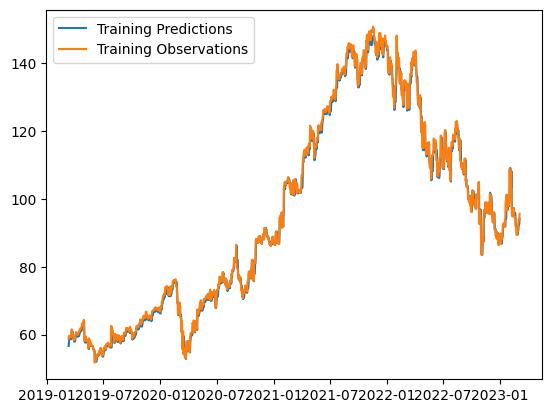

In [ ]:
train_predictions=model.predict(X_train).flatten()

plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.legend(['Training Predictions','Training Observations'])

6/6 [==============================] - 0s 3ms/step


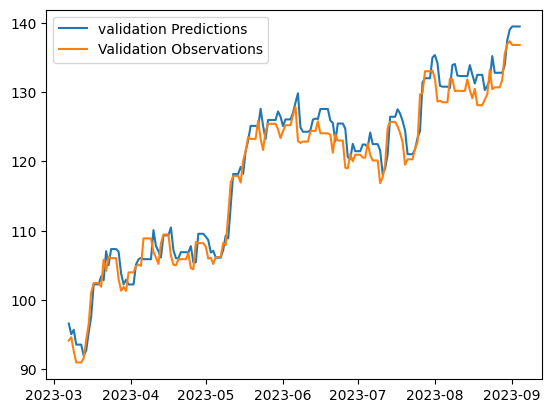

In [ ]:
val_predictions=model.predict(X_val).flatten()

plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.legend(['validation Predictions','Validation Observations'])

6/6 [==============================] - 0s 2ms/step


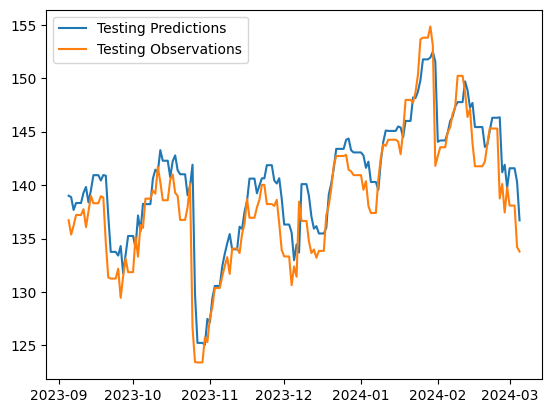

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

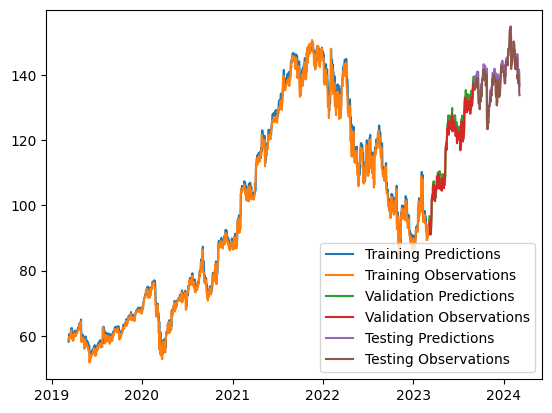

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
# Recursively making prediction on the future value, using the predicted present value

from copy import deepcopy

recursive_predictions = []
recursive_dates= dates_test
# recursive_dates=np.concatenate([dates_val, dates_test])
print(len(recursive_dates))
last_window = deepcopy(X_val[-1])

for target_date in recursive_dates:
    next_prediction=model.predict(np.array([last_window[-3:]])).flatten()
    recursive_predictions.append(next_prediction)
    last_window=np.concatenate((last_window,[next_prediction]))
    #print(last_window)

print(recursive_predictions)

183
1/1 [==============================] - 0s 21ms/step
[array([139.466], dtype=float32), array([141.3176], dtype=float32), array([142.98856], dtype=float32), array([144.41785], dtype=float32), array([145.59267], dtype=float32), array([146.52281], dtype=float32), array([147.23613], dtype=float32), array([147.76541], dtype=float32), array([148.14658], dtype=float32), array([148.41554], dtype=float32), array([148.60332], dtype=float32), array([148.73337], dtype=float32), array([148.82295], dtype=float32), array([148.88443], dtype=float32), array([148.92651], dtype=float32), array([148.95528], dtype=float32), array([148.9749], dtype=float32), array([148.98827], dtype=float32), array([148.99736], dtype=float32), array([149.00357], dtype=float32), array([149.0078], dtype=float32), array([149.01068], dtype=float32), array([149.01263], dtype=float32), array([149.01396], dtype=float32), array([149.01488], dtype=float32), array([149.01549], dtype=float32), array([149.01591], dtype=float32), arr

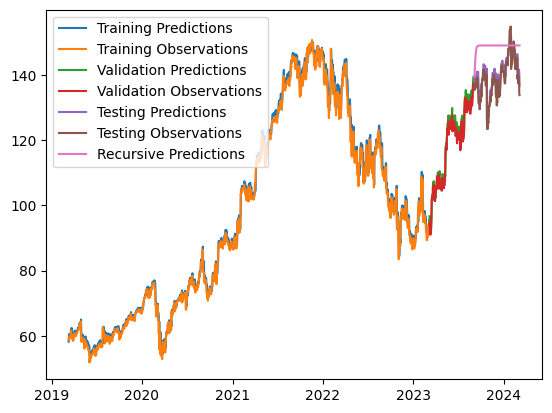

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])